In [1]:
!conda install -c conda-forge tensorflow --yes
!conda install -c conda-forge keras --yes

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\hktse>set "KERAS_BACKEND=" 

C:\Users\hktse>python C:\Users\hktse\Anaconda3\etc\keras\load_config.py  1>temp.txt 

C:\Users\hktse>set /p KERAS_BACKEND= 0<temp.txt 

C:\Users\hktse>del temp.txt 

C:\Users\hktse>python -c "import keras"  1>nul 2>&1 

C:\Users\hktse>if errorlevel 1 (
ver  1>nul  
 set "KERAS_BACKEND=theano"  
 python -c "import keras"  1>nul 2>&1 
) 

C:\Users\hktse>SET DISTUTILS_USE_SDK=1 

C:\Users\hktse>SET MSSdk=1 

C:\Users\hktse>SET platform= 

C:\Users\hktse>IF /I [AMD64] == [amd64] set "platform=true" 

C:\Users\hktse>IF /I [] == [amd64] set "platform=true" 

C:\Users\hktse>if defined platform (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\VisualStudio\14.0" )  ELSE (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\VisualStudio\14.0" ) 

C:\Users\hktse>for /F "skip=2 tokens=2,*" %A in ('reg query "HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\Vi

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


Solving environment: ...working... done

# All requested packages already installed.


C:\Users\hktse>set "KERAS_BACKEND=" 

C:\Users\hktse>python C:\Users\hktse\Anaconda3\etc\keras\load_config.py  1>temp.txt 

C:\Users\hktse>set /p KERAS_BACKEND= 0<temp.txt 

C:\Users\hktse>del temp.txt 

C:\Users\hktse>python -c "import keras"  1>nul 2>&1 

C:\Users\hktse>if errorlevel 1 (
ver  1>nul  
 set "KERAS_BACKEND=theano"  
 python -c "import keras"  1>nul 2>&1 
) 

C:\Users\hktse>SET DISTUTILS_USE_SDK=1 

C:\Users\hktse>SET MSSdk=1 

C:\Users\hktse>SET platform= 

C:\Users\hktse>IF /I [AMD64] == [amd64] set "platform=true" 

C:\Users\hktse>IF /I [] == [amd64] set "platform=true" 

C:\Users\hktse>if defined platform (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\VisualStudio\14.0" )  ELSE (set "VSREGKEY=HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\VisualStudio\14.0" ) 

C:\Users\hktse>for /F "skip=2 tokens=2,*" %A in ('reg query "HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\Vi

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
from IPython.core.interactiveshell import InteractiveShell

nltk.download('stopwords')
df = df.reset_index(drop=True)
STOPWORDS = set(stopwords.words('english'))

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hktse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [5]:
df = pd.read_csv('D:\misc\consumers.csv')
df.info

<bound method DataFrame.info of      date_received                  product  \
0        1/30/2014              Credit card   
1        12/5/2012             Student loan   
2        2/24/2014          Debt collection   
3       12/16/2014                 Mortgage   
4        8/10/2012                 Mortgage   
5        3/17/2015  Bank account or service   
6        3/27/2014  Bank account or service   
7        1/26/2013              Credit card   
8       11/19/2015  Bank account or service   
9        3/25/2013                 Mortgage   
10       8/15/2014         Credit reporting   
11       9/23/2015                 Mortgage   
12       8/19/2015          Debt collection   
13      10/12/2015              Credit card   
14       1/10/2014          Debt collection   
15      11/11/2015         Credit reporting   
16       8/17/2014         Credit reporting   
17        7/3/2014         Credit reporting   
18       5/12/2014                 Mortgage   
19       4/14/2015          

In [6]:
df.shape

(10000, 18)

In [7]:
df['product'].value_counts()

Mortgage                   3375
Debt collection            1883
Credit reporting           1642
Credit card                1165
Bank account or service    1081
Consumer Loan               368
Student loan                295
Payday loan                  75
Money transfers              74
Prepaid card                 31
Other financial service      11
Name: product, dtype: int64

In [8]:
df = df[df['product'] != 'Other financial service']

In [9]:
df['product'].value_counts()

Mortgage                   3375
Debt collection            1883
Credit reporting           1642
Credit card                1165
Bank account or service    1081
Consumer Loan               368
Student loan                295
Payday loan                  75
Money transfers              74
Prepaid card                 31
Name: product, dtype: int64

In [10]:
def print_plot(index):
    example = df[df.index == index][['consumer_complaint_narrative', 'product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

nan
Product: Credit reporting


In [13]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].astype(str)
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(clean_text)
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].str.replace('\d+', '')

In [14]:
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['consumer_complaint_narrative'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 7712 unique tokens.


In [15]:
X = tokenizer.texts_to_sequences(df['consumer_complaint_narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9989, 250)


In [16]:
Y = pd.get_dummies(df['product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9989, 10)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7491, 250) (7491, 10)
(2498, 250) (2498, 10)


In [18]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 6741 samples, validate on 750 samples
Epoch 1/5
6741/6741 [==============================] - 74s 11ms/step - loss: 1.8347 - accuracy: 0.3437 - val_loss: 1.8261 - val_accuracy: 0.3120
Epoch 2/5
6741/6741 [==============================] - 46s 7ms/step - loss: 1.7821 - accuracy: 0.3578 - val_loss: 1.8146 - val_accuracy: 0.3280
Epoch 3/5
6741/6741 [==============================] - 48s 7ms/step - loss: 1.7683 - accuracy: 0.3755 - val_loss: 1.8029 - val_accuracy: 0.3373
Epoch 4/5
6741/6741 [==============================] - 51s 8ms/step - loss: 1.7336 - accuracy: 0.3907 - val_loss: 1.7692 - val_accuracy: 0.3547
Epoch 5/5
6741/6741 [==============================] - 47s 7ms/step - loss: 1.6980 - accuracy: 0.4041 - val_loss: 1.7750 - val_accuracy: 0.3547


In [19]:
accr = model.evaluate(X_test,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2498/2498 [==============================] - 7s 3ms/step
Test set
  Loss: 1.723
  Accuracy: 0.362


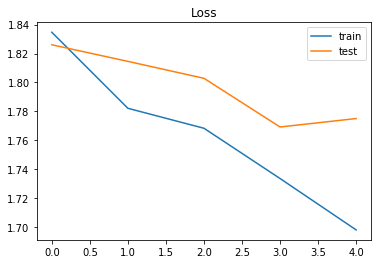

In [20]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

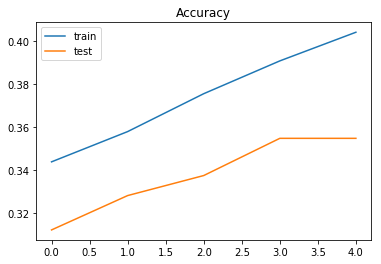

In [21]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [22]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[0.07670254 0.1373481  0.20373867 0.2945518  0.03260808 0.03606531
  0.03233912 0.03237077 0.05740429 0.09687129]] Credit card or prepaid card
